In [4]:
import pandas as pd
import source.utilities as util
import source.loader as load

In [6]:
def analyzeCreditCard(month):
# Import Credit Card Account
  wfDf = load.importWF('./input/wf_credit_2023.csv');
  boaDf = load.importBOACredit('./input/boa_credit_12.csv');
  appleDf = load.importApple('./input/apple_12_2023.csv');
  amexDf = load.importAmex('./input/amex_credit_2023.csv');

  df = pd.concat([wfDf, boaDf, appleDf, amexDf], axis=0)
  df = util.sanitizeDataframe(df);

  # making transactions to be positive
  df['transaction'] = df['transaction'].abs()
  df = util.filter_df_at_month(df, month)

  total_transaction_sum = df['transaction'].sum()
  print(f'Total Expense: {total_transaction_sum}')
  totalExpense = df.groupby('category')['transaction'].sum()
  print(f'Expense: {totalExpense}')

  util.plotDataframe(df, f'{month}/2023 Credit Card')


def analyzeChecking(month):
  # Import Checking Account
  wfDf = load.importWF('./input/wf_2023_checking.csv');
  boaDf = load.importBOA('./input/boa_2023_checking.csv');
  tdDf = load.importTD('./input/td_2023_checking.csv');

  df = pd.concat([wfDf, boaDf, tdDf], axis=0)
  df = util.sanitizeDataframe(df, 'transaction');
  df = util.filter_df_at_month(df, month)
  util.exportDataframe(df, f'checking_{month}_23')

  incomeDf = df[df['transaction'] >= 0]
  totalIncomeSum = incomeDf['transaction'].sum()
  print(f'Total Income: {totalIncomeSum}')

  # totalIncome = incomeDf.groupby('category')['transaction'].sum()
  # print(f'Income: {totalIncome}')
  util.exportDataframe(incomeDf, f'checking_income_{month}_23')

  expenseDf = df[df['transaction'] < 0]
  totalExpense = expenseDf.groupby('category')['transaction'].sum()
  expenseDf.loc[:, 'transaction'] = expenseDf['transaction'].abs()

  totalExpenseSum = expenseDf['transaction'].sum()
  print(f'Total Expense: {totalExpenseSum}')

  print(f'Expense: {totalExpense}')
  # showPercentage(expenseDf)
  util.exportDataframe(expenseDf, f'checking_expense_{month}_23')
  util.plotDataframe(expenseDf, f'{month}/2023 Checking Expense')

Total Income: 13069.910000000002
Total Expense: 10425.689999999999
Expense: category
CREDIT CARD    -3126.86
EXPENSE         -461.63
PROPERTY       -6447.54
SUBSCRIPTION     -34.99
UTILITIES       -354.67
Name: transaction, dtype: float64


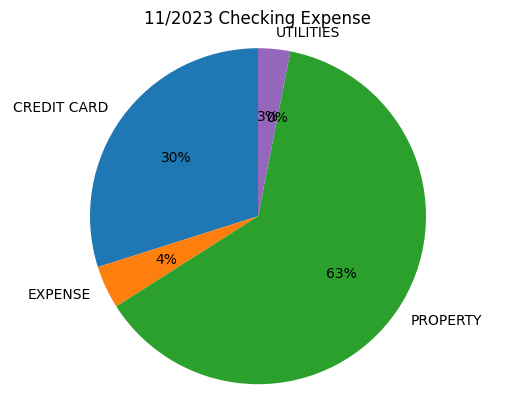

In [8]:
analyzeChecking(11)

Expense: category
DINING            113.74
ENTERTAINMENT      52.79
GROCERY           437.92
SERVICE            89.54
SHOPPING         3113.58
SUBSCRIPTION      315.54
TRAVEL           3112.44
UTILITIES         689.34
Name: transaction, dtype: float64


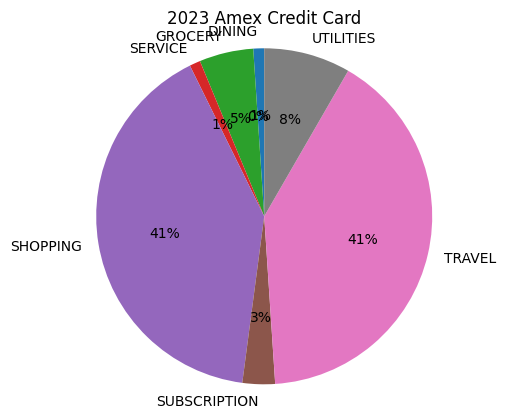

In [17]:
# Import AMEX
amexDf = load.importAmex('./input/amex_credit_2023.csv');
df = util.sanitizeDataframe(amexDf);

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'amex')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '2023 Amex Credit Card')

Expense: category
COMMUTE           -34.80
DINING           -822.99
ENTERTAINMENT     -44.28
GROCERY          -268.40
HEALTH CARE     -1337.66
OTHER            -493.49
SERVICE          -494.44
SHOPPING         -267.02
UTILITIES        -122.79
Name: transaction, dtype: float64


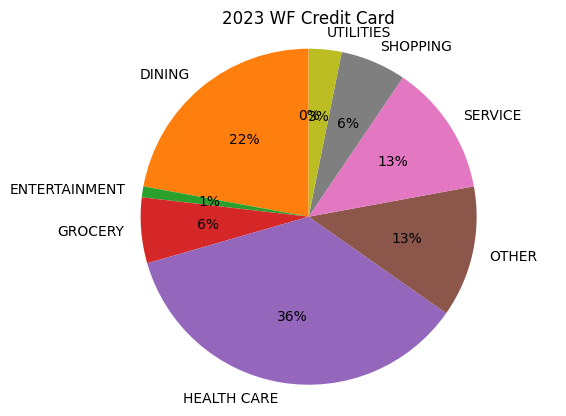

In [18]:
# Import Wells Fargo
wfDf = load.importWF('./input/wf_credit_2023.csv');
df = util.sanitizeDataframe(wfDf);

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'wf')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '2023 WF Credit Card')